## Importando as bibliotecas:

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importando os dados de treinamento e de teste usando o pandas:

In [3]:
minimo_infectados = pd.read_csv('/home/germano/Área de trabalho/Códigos IC/Data-1290240.csv', header = None)

Agora vamos nomear cada coluna de modo a facilitar o nosso trabalho:

In [4]:
column_names = ['n', 'r0', 'gamma', 'delta' ,'vac_num', 't0', 'a' , 'min_inf']
minimo_infectados.columns = column_names

## Analisando os dados e obtendo informações sobre eles:

In [5]:
minimo_infectados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290240 entries, 0 to 1290239
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   n        1290240 non-null  float64
 1   r0       1290240 non-null  float64
 2   gamma    1290240 non-null  float64
 3   delta    1290240 non-null  float64
 4   vac_num  1290240 non-null  float64
 5   t0       1290240 non-null  int64  
 6   a        1290240 non-null  float64
 7   min_inf  1290240 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 78.8 MB


In [6]:
minimo_infectados = minimo_infectados[minimo_infectados['r0'] != 1]
minimo_infectados.describe()

,n,r0,gamma,delta,vac_num,t0,a,min_inf
count,1.290240e+06,1.290240e+06,1.290240e+06,1.290240e+06,1.290240e+06,1.290240e+06,1.290240e+06,1.290240e+06
mean,2.777500e+06,5.062500e+00,1.250000e-01,3.000000e-02,9.000000e-01,8.000000e+01,5.500000e-02,1.452409e-05
std,4.187843e+06,4.382763e+00,5.590172e-02,3.449639e-02,3.872985e-01,4.000002e+01,2.872282e-02,3.271680e-05
min,1.000000e+04,1.200000e+00,5.000000e-02,2.000000e-03,3.000000e-01,2.000000e+01,1.000000e-02,9.881313e-324
25%,7.750000e+04,1.950000e+00,8.750000e-02,5.500000e-03,6.000000e-01,4.000000e+01,3.000000e-02,4.160235e-13
50%,5.500000e+05,2.700000e+00,1.250000e-01,9.000000e-03,9.000000e-01,8.000000e+01,5.500000e-02,1.000000e-07
75%,3.250000e+06,7.500000e+00,1.625000e-01,4.750000e-02,1.200000e+00,1.200000e+02,8.000000e-02,1.000000e-05
max,1.000000e+07,1.500000e+01,2.000000e-01,1.000000e-01,1.500000e+00,1.400000e+02,1.000000e-01,1.000000e-04


In [7]:
minimo_infectados['log_n'] = np.log10(minimo_infectados['n'])
minimo_infectados.drop('n', axis=1)

,r0,gamma,delta,vac_num,t0,a,min_inf,log_n
0,3.0,0.05,0.010,0.9,20,0.01,1.000000e-04,4.0
1,3.0,0.05,0.010,0.9,20,0.04,1.000000e-04,4.0
2,3.0,0.05,0.010,0.9,20,0.07,1.000000e-04,4.0
3,3.0,0.05,0.010,0.9,20,0.10,1.000000e-04,4.0
4,3.0,0.05,0.010,0.9,40,0.01,1.000000e-04,4.0
...,...,...,...,...,...,...,...,...
1290235,15.0,0.20,0.004,1.5,140,0.06,1.005029e-188,7.0
1290236,15.0,0.20,0.004,1.5,140,0.07,6.388325e-190,7.0
1290237,15.0,0.20,0.004,1.5,140,0.08,8.902350e-191,7.0
1290238,15.0,0.20,0.004,1.5,140,0.09,1.692392e-191,7.0


In [8]:
minimo_infectados['prob_ext'] = np.where(
    minimo_infectados['min_inf'] >= 1 / (10**minimo_infectados['log_n']),
    0,
    1 - minimo_infectados['min_inf'] * 10**minimo_infectados['log_n'])

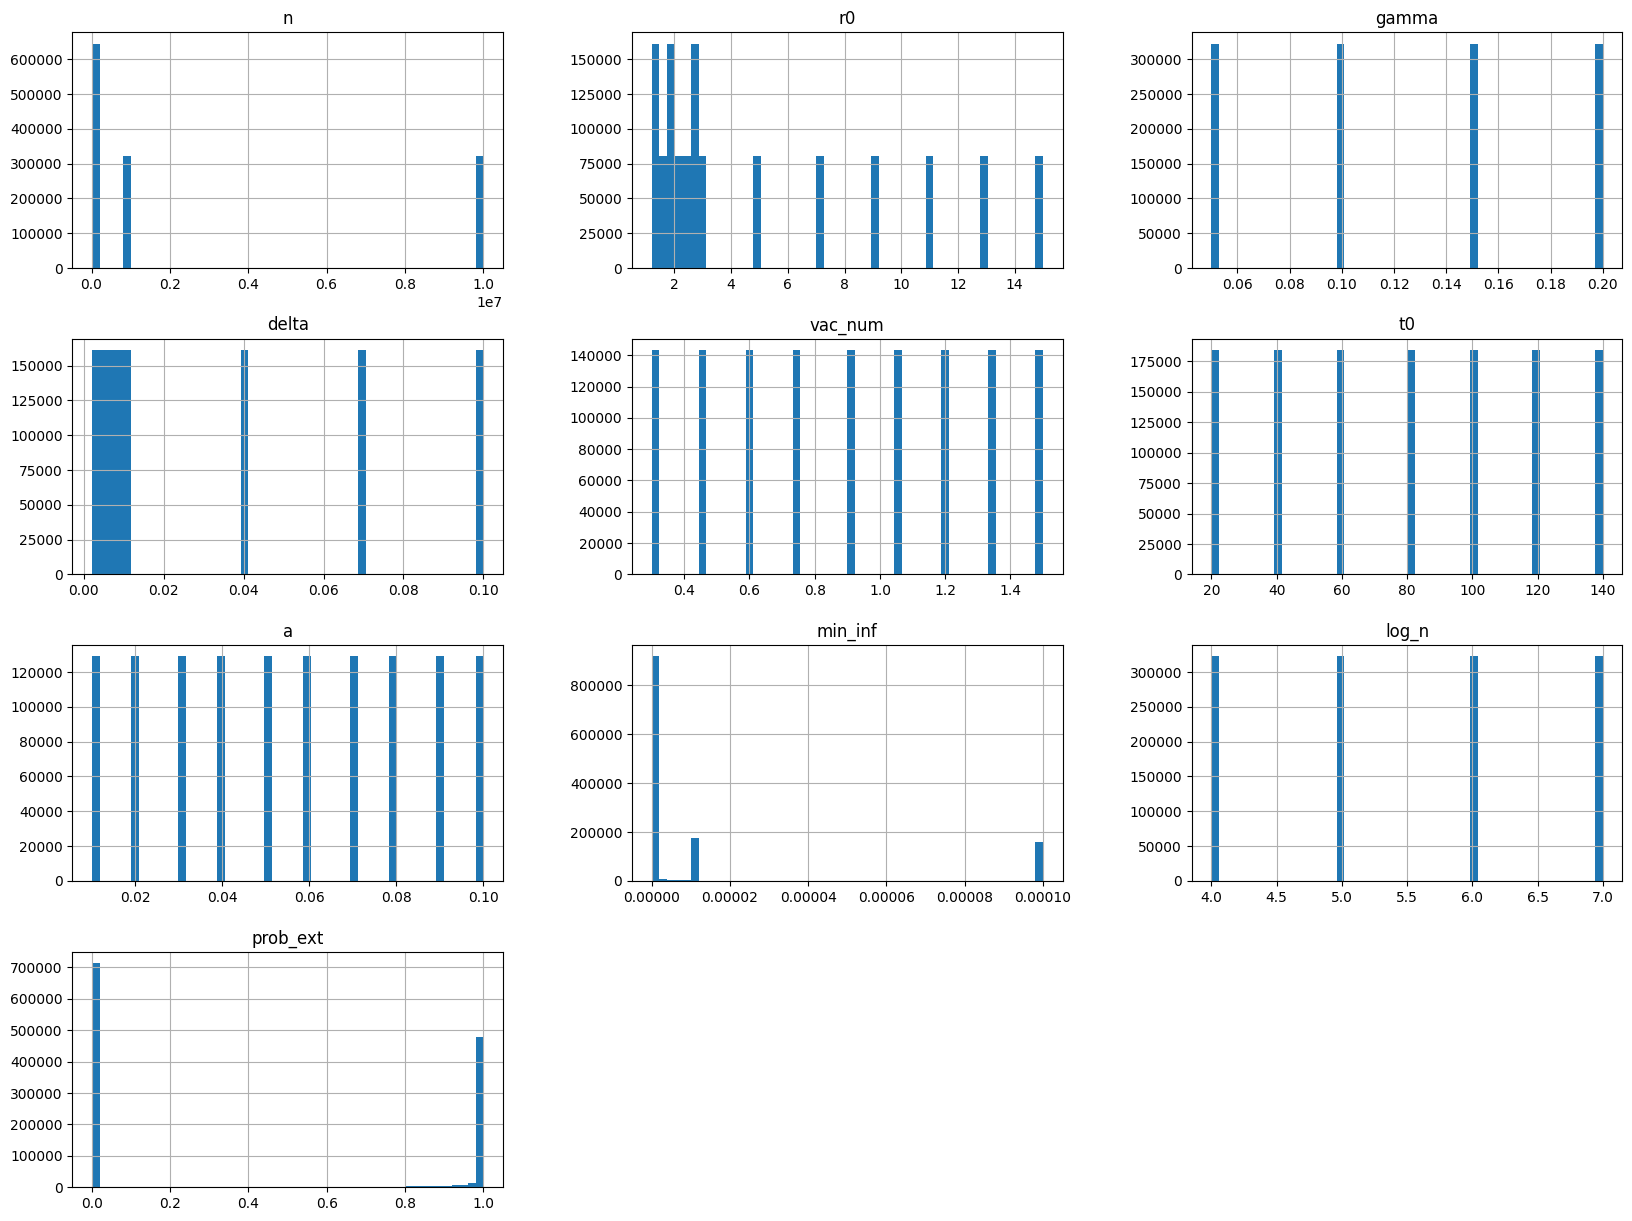

In [9]:
minimo_infectados.hist(bins=50, figsize=(20,15))
plt.show()

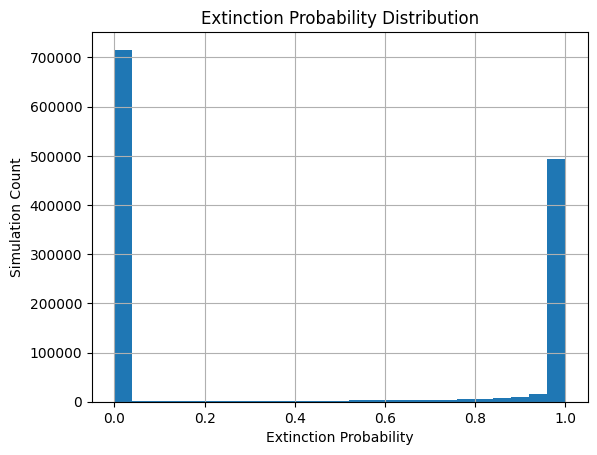

In [11]:
minimo_infectados['prob_ext'].hist(bins = 25)
plt.title('Extinction Probability Distribution')
plt.xlabel('Extinction Probability')
plt.ylabel('Simulation Count')
plt.show()

## Criando o Test Set e o Train Set:

O Test set é uma parcelo dos dados (cerca de 20%) que será usada para testar a acurácia do algoritmo que iremos desenvolver. Esta arte dos dados não deve ser usada para treinar a máquina e não deve ser analisada para não nos enviesar na hora de programar o algoritmo. Já o Train Set são os dados restantes que serão efetivamente usados no treinamento da máquina.

Porém, nesta etapa não basta apenas tomar uma parcela dos dados de maneira aleatória, precisamos garantir que todas as vezes que rodarmos o código cada Set seja composto pelo mesmo conjunto de dados.Do contrário, com o passar do tempo o algortimo terá acesso a todos os dados, tornando-o enviesado. 

Uma forma de evitar este problema é utilizando uma random seed fixa do numpy, de modo que toda vez os dados sejam organizados da mesma maneira. Porém, isto é garantido apenas no caso de utilizarmos sempre a mesma base de dados, o que pode não ser verdade no caso em que queremos adicionar mais dados ao nosso algoritmo.

A melhor forma de contornar este problema é usar um indicador ligado a cada dado de entrada que irá definir se ele irá para o set de teste ou de treino. No nosso caso atual, não há uma coluna com um ID que identifique cada dado como único, então iremos primeiramente gerar essa coluna com o pandas (simplesmente iremos adicionar uma primeira coluna com o número de cada linha).

In [14]:
minimo_infectados_id = minimo_infectados.reset_index() # Adiciona uma coluna com o índice de cada linha

In [15]:
minimo_infectados_id

,index,n,r0,gamma,delta,vac_num,t0,a,min_inf,log_n,prob_ext
0,448,10000.0,3,0.05,0.01,0.9,20,0.01,1.000000e-04,4.0,0.0
1,449,10000.0,3,0.05,0.01,0.9,20,0.04,1.000000e-04,4.0,0.0
2,450,10000.0,3,0.05,0.01,0.9,20,0.07,1.000000e-04,4.0,0.0
3,451,10000.0,3,0.05,0.01,0.9,20,0.10,1.000000e-04,4.0,0.0
4,452,10000.0,3,0.05,0.01,0.9,40,0.01,1.000000e-04,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
282235,322555,10000000.0,15,0.20,0.10,1.5,140,0.03,1.000000e-07,7.0,0.0
282236,322556,10000000.0,15,0.20,0.10,1.5,140,0.05,1.000000e-07,7.0,0.0
282237,322557,10000000.0,15,0.20,0.10,1.5,140,0.06,1.000000e-07,7.0,0.0
282238,322558,10000000.0,15,0.20,0.10,1.5,140,0.08,1.000000e-07,7.0,0.0


Agora vamos tomar o train set e o test set estratificados, de modo que os dados em cada set sejam uma representação satisfatória do todo. Ademais, iremos separar a probabilidade de extinção do restante dos dados, visto que este dado será usado como rótulo de cada array no nosso treinamento supervisionado. 
É desejável que o Test Set tenha uma estratificação bastante semelhante aos dados que reais que serão o alvo do nosso algrotimo. Para este fim, pode-se utilizar a biblioteca sklearn.model_selection, da qual é necessário importar apenas o método StratifiedShuffleSplit, como é feito no bloco de código abaixo. 

In [16]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Antes de criar efetivamente o trainig set e o test set, precisamos criar uma nova variável que será usada como rótulo de cada conjunto de parâmetros e será usada no nosso aprendizado de máquina supervisionado. Esta variável em questão é a probabilidade de extinção, chamada neste código de prob_ext e que está definida logo abaixo:

p(min_inf) = 1 - min_inf*n, se min_inf < 1/n

Senão:

p(min_inf) = 0

In [18]:
minimo_infectados_id['prob_ext'] = np.where(
    minimo_infectados_id['min_inf'] > 1 / (10**minimo_infectados_id['log_n']),
    0,
    1 - minimo_infectados_id['min_inf'] * 10**minimo_infectados_id['log_n'])

Agora, finalmente podemos definir o nosso test set e o training set: 

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(minimo_infectados_id, minimo_infectados_id['r0']):
    strat_train_set = minimo_infectados_id.loc[train_index]
    strat_test_set = minimo_infectados_id.loc[test_index]

In [20]:
sirs_labels = strat_train_set['prob_ext'].copy()
sirs = strat_train_set.drop('prob_ext', axis=1)

Também iremos criar uma nova coluna onde estará armazenada a taxa de transmissão da doença, que chamaremos aqui de $ \beta = \mu \cdot R_0 $, de modo que nosso algoritmo posso basear-se em outro parâmetro muito utilizado em epidemiologia.

In [21]:
sirs['beta'] = sirs['gamma']*sirs['r0']

## Estudando e analisando os dados:

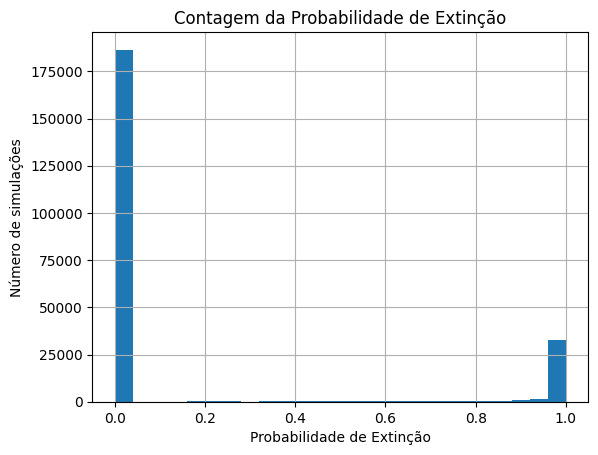

In [22]:
sirs_labels.hist(bins = 25)
plt.title('Contagem da Probabilidade de Extinção')
plt.xlabel('Probabilidade de Extinção')
plt.ylabel('Número de simulações')
plt.show()

Nosso próximo passo será analisar a matriz de correlação entre os dados, de modo que possamos analisar como as variáveis e os parâmetros se relacionam. Porém precisamos eliminar desta análise a o mínimo de infectados, que não será utilizado e os índices, que não possuem nenhum significado na análise.

In [23]:
sirs_completo = pd.concat([sirs, sirs_labels], axis=1)
sirs_completo = sirs_completo.drop(columns=['index','min_inf'])
corr_matrix = sirs_completo.corr()
corr_matrix

,n,r0,gamma,delta,vac_num,t0,a,log_n,beta,prob_ext
n,1.000000,-0.001145,-0.000893,-0.000853,-0.000079,-0.000083,-0.000588,0.824085,-0.001165,-0.056000
r0,-0.001145,1.000000,0.000386,-0.000378,-0.001346,-0.000116,0.002074,-0.001966,0.672256,0.099853
gamma,-0.000893,0.000386,1.000000,0.001055,-0.001204,-0.001796,0.002245,-0.000627,0.676789,0.179414
delta,-0.000853,-0.000378,0.001055,1.000000,0.001488,-0.001965,-0.000843,-0.000339,0.000289,-0.571626
vac_num,-0.000079,-0.001346,-0.001204,0.001488,1.000000,0.001495,0.000972,-0.000265,-0.002065,0.226044
t0,-0.000083,-0.000116,-0.001796,-0.001965,0.001495,1.000000,-0.001110,-0.001321,-0.001249,0.024071
a,-0.000588,0.002074,0.002245,-0.000843,0.000972,-0.001110,1.000000,-0.000205,0.002850,0.071858
log_n,0.824085,-0.001966,-0.000627,-0.000339,-0.000265,-0.001321,-0.000205,1.000000,-0.001691,-0.072723
beta,-0.001165,0.672256,0.676789,0.000289,-0.002065,-0.001249,0.002850,-0.001691,1.000000,0.189427
prob_ext,-0.056000,0.099853,0.179414,-0.571626,0.226044,0.024071,0.071858,-0.072723,0.189427,1.000000


Vamos plotar isso num gráfico de correlação visualizar melhor estes dados:

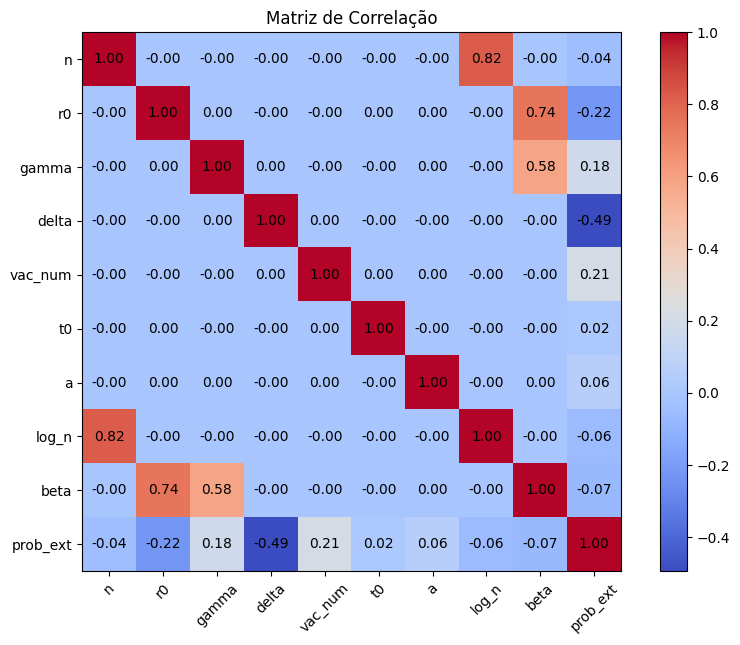

In [22]:
plt.figure(figsize=(10, 7))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

labels = corr_matrix.columns  # Obtendo os nomes das colunas

plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.title("Matriz de Correlação")
plt.show()


Analisando as variáveis acima, vemos que algumas das variáveis já se mostram relacionadas, como por exemplo, quanto maior o R0, menor é a probabilidade de extinção, exatamente como esperávamos. Devido ao corte que fizemos quanto a probabilidade de extinção em relação a qualquer mínimo de infectados maior que 1 indivíduo resultasse p = 0, não temos uma correlação mais negativa entre ambas as grandezas.

Outro ponto que chama a atenção é a aparente não relação entre o dia de início da campanha e a probabilidade de extinção. Isso pode se dar por dois motivos: Não há relação entre as variáveis, ou a relação é fortemente não linear, como por exemplo um caso oscilatório, visto que pode ser benéfico vacinar e um vale e não tão efetivo vacinar em um pico.

## Preparando os Dados para o Algoritmo de Machine Learning:

Agora a variável sirs representa o nosso training set e sirs_labels o rótulo de cada dado do training set.

## Dimensionamento de Dados (Feature Scaling):

Normalmente algoritmos de Machine Learning não performam bem quando os dados possuem ordens de grandeza muito distintas. Por este motivo é interessante normalizar nosso dados, de modo que todos os dados assumam valores entre 0 e 1. Outra forma de redimensionar os dados é através do chamado Standardization, onde a média é subtraída de cada valor, de modo que a média passe a ser 0, e depois todos os valor são divididos pelo desvio padrão, de modo que o desvio padrãos e torne 1. O primeiro método é melhor para alimentar o algoritmo devido a ele se dar muito bem com valores entre 0 e 1, porém ele acaba sendo muito afetado por outliers, o que é um ponto forte do segundo método que sofre menos com esse tipo de dado.

## Transformation Pipelines

No código abaixo iremos usar as ideias discutidas nos tópicos acima, de modo que nossos dados estejam aptos a alimentar o algoritmo de machine learning.

In [23]:
sirs = sirs.drop(columns=['index','min_inf','n'])
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([('std_scaler', StandardScaler()),
])
sirs_prepared = num_pipeline.fit_transform(sirs)

In [24]:
np.shape(sirs_prepared)

(258048, 8)

In [25]:
sirs_prepared

array([[-6.54653671e-01, -1.34227213e+00, -1.34226343e+00, ...,
         1.73943354e-01, -1.34212833e+00, -9.73930755e-01],
       [ 6.54653671e-01,  4.46139583e-01, -1.34226343e+00, ...,
        -8.70016147e-01,  1.34092915e+00,  8.42934588e-01],
       [-6.54653671e-01,  1.34034544e+00, -1.34226343e+00, ...,
         8.69916355e-01,  1.34092915e+00, -6.10035359e-04],
       ...,
       [-6.54653671e-01,  1.34034544e+00, -1.34226343e+00, ...,
        -1.56598915e+00,  1.34092915e+00, -6.10035359e-04],
       [ 1.09108945e+00, -4.48066273e-01, -1.34226343e+00, ...,
         1.21790286e+00, -1.34212833e+00,  3.88718252e-01],
       [-1.09108945e+00,  1.34034544e+00,  4.45827404e-01, ...,
        -5.22029646e-01, -4.47775836e-01, -5.19714419e-01]])

StandardScaler() → Normaliza os dados para que todas as variáveis fiquem na mesma escala, garantindo que nenhuma tenha peso excessivo no modelo.

Com base em tudo o que montamos e vimos acima, vamos agora transformart o training set "sirs" usando estas transformações.

## Selecionando e Treinando um Modelo:

### Linear regression mode:

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(sirs_prepared, sirs_labels)

LinearRegression()

In [27]:
print("Predictions:", lin_reg.predict(sirs))

Predictions: [ 0.29851224 -0.10531521  0.68509125 ...  0.70924834 -0.31093698
  0.24934841]


/home/germano/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
sirs_prepared = pd.DataFrame(sirs_prepared)
print(sirs_prepared.describe())  # Se X for um DataFrame pandas
print(sirs_labels.min(), sirs_labels.max()) 

                  0             1             2             3             4  \
count  2.580480e+05  2.580480e+05  2.580480e+05  2.580480e+05  2.580480e+05   
mean  -6.608470e-19  2.061567e-16 -9.835607e-17 -1.621829e-17 -9.174760e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.527525e+00 -1.342272e+00 -1.342263e+00 -1.546737e+00 -1.499440e+00   
25%   -7.637626e-01 -4.480663e-01 -4.482180e-01 -7.724728e-01 -9.992341e-01   
50%    0.000000e+00  4.461396e-01  4.458274e-01  1.791278e-03  1.178562e-03   
75%    7.637626e-01  1.340345e+00  1.339873e+00  7.760553e-01  1.001591e+00   
max    1.527525e+00  1.340345e+00  1.339873e+00  1.550319e+00  1.501798e+00   

                  5             6             7  
count  2.580480e+05  2.580480e+05  2.580480e+05  
mean  -3.469447e-17 -9.554747e-18 -4.020153e-17  
std    1.000002e+00  1.000002e+00  1.000002e+00  
min   -1.565989e+00 -1.342128e+00 -1.233483e+00  
25%   -8.700161e-01 -4.477758e-01 -7.4

In [29]:
print("Labels:", list(sirs_labels))

Labels: [0.0, 0.0, 0.9999998013399909, 0.6753540154177933, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9767361609561996, 0.0, 0.0, 1.0, 0.0, 0.0, 0.9501176618756926, 0.0, 0.0, 0.0, 0.6817055054398065, 0.9993759302563284, 0.40846571148936117, 0.0, 0.0, 0.0, 0.9999999999999991, 0.993946294096997, 0.0, 0.0, 0.8154504096964351, 0.61988062809832, 0.0, 0.8206180569090261, 0.9839100581309373, 0.0, 1.0, 0.0, 0.9662099188885186, 0.9976159549393329, 0.0, 0.0, 0.5285096499635648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.846646264000273, 0.41453045433968405, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9983396588243518, 1.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999999626, 0.9999999999986213, 0.0, 0.8814609155241919, 0.0, 0.9999999974885959, 0.9788679962411155, 0.0, 0.0, 0.49168642550261266, 0.0, 0.0, 0.0, 0.9999999845148343, 0.0, 0.0, 0.999999686917312, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9996693526819812, 0.0, 0.9999999998266932, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.960324

In [30]:
from sklearn.metrics import mean_squared_error
sirs_predictions = lin_reg.predict(sirs_prepared)
lin_mse = mean_squared_error(sirs_labels, sirs_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.32049388122975164)

Como podemos ver, este modelo tem um desempenho bastante ruim, pois está underfitting os dados. Vamos testar um novo modelo, o DecisionTreeRegressor.

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(sirs_prepared, sirs_labels)

DecisionTreeRegressor()

Vamos avaliar o desempenho deste novo método calculando o seu erro.

In [33]:
sirs_predictions = tree_reg.predict(sirs_prepared)
tree_mse = mean_squared_error(sirs_labels, sirs_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(6.619642665112611e-09)

Como pode-se perceber, deve haver algo errado aqui. Neste exemplo temos um claro caso de overfitting, o que será demosntrado na célula de código a seguir, onde iremos testar este método através do Cross-Validation, que consiste em dividir o training set em duas parte, sendo uma usada para treinar o modelo e a segunda usada para verificar a qualidade desse modelo. Uma boa alternativa para isso é a a biblioteca K-fold cross-validation, que cria 10 subgrupos, sendo 9 usados para treinar o modelo e um para validá-lo a cada vez, retornando um vetor com 10 resultados de sua precisão. 

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, sirs_prepared, sirs_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [0.03012115 0.03084316 0.028577   0.02644782 0.02669094 0.0295245
 0.0277743  0.02662926 0.02809567 0.02767605]
Mean: 0.028237984859045728
Standard deviation: 0.00144361725671765


In [35]:
lin_scores = cross_val_score(lin_reg, sirs_prepared, sirs_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.31958706 0.320829   0.32047818 0.32052319 0.31965595 0.32094736
 0.32016078 0.3189073  0.32123581 0.32271362]
Mean: 0.3205038264026666
Standard deviation: 0.0009974165948631309


Como visto acima o método decision tree obteve um resultado melhor na média que a regressão linear, portanto já podemos descartar a regressão linear.

Vamos tentar agora um terceiro método e ver como ele se sai, o RandomForestRegressor.

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(sirs_prepared, sirs_labels)
scores = cross_val_score(forest_reg, sirs_prepared, sirs_labels,
scoring="neg_mean_squared_error", cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)
forest_reg.predict(sirs)

Scores: [0.02510377 0.02460669 0.02470427 0.02256417 0.02343302 0.02507824
 0.02318898 0.02282538 0.02466253 0.02438347]
Mean: 0.024055052429905587
Standard deviation: 0.0009067105252810747


/home/germano/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

Exportando as predições deste modelo é possível ver que todas as saídas dele são nulas, visto que desta forma o erro quadrático médio foi minimizado, porém isto o torna completamente inútil para no nosso trabalho. Portanto seguiremos procurando modelos melhores.

In [37]:
forest_reg_predictions = pd.DataFrame(forest_reg.predict(sirs))
forest_reg_predictions.to_csv("random_forest.csv", index=False)

/home/germano/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Uma etapa muito importante ao utilizar um modelo de Machine Learning é salvar os resultados obtidos para mais tarde ou utilizá-los, ou compará-los com outros modelos para ver se eles são satisfatórios ou não. Para isso, podemos usar o joblib, que irá armazenar estes dados para consulta futura.

In [38]:
import joblib
joblib.dump(forest_reg, "forest_reg.pkl")
forest_reg_loaded = joblib.load("forest_reg.pkl")

In [39]:
forest_reg_loaded

RandomForestRegressor()

## Refine Seu Modelo: 

### Grid Search:

Uma maneira de fazer isso seria ajustar manualmente os hiperparâmetros até encontrar uma combinação ideal de valores. No entanto, esse processo seria muito lento e trabalhoso, portanto é recomendado usar o GridSearchCV do Scikit-Learn para fazer esta busca. Para isto, basta informar quais hiperparâmetros testar e quais valores experimentar. O GridSearchCV avaliará todas as possíveis combinações de valores de hiperparâmetros usando validação cruzada.

Os dois hiperparâmetros que iremos variar aqui são:

Max_features: Informa quantas das entradas fornecidas serão usadas em cada nó nas árvores da Random Forest. Quanto menos features, mais independentes entre si são as árvores e consequentemente menor é o overfitting. Quanto mais features, mais complexo será o nosso modelo. 

N_estimators: O número de estimadores nos informa quantas árvores de decisão serão criadas.

A variável bootstrap indica se as amostras com as quais cada árvore será treinada é aleatória ou não. No caso em que a variável é igual a False todas as árvores são treinadas usando o training set completo, o que acaba diminuindo a diversidade nos resultados.

Por exemplo, o código a seguir busca a melhor combinação de valores de hiperparâmetros para o RandomForestRegressor:

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(sirs_prepared, sirs_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [41]:
best_model = grid_search.best_estimator_  
predictions = best_model.predict(sirs_prepared) 
print(predictions, sirs_labels)

[0.         0.         0.99999969 ... 0.98299319 0.99944774 0.        ] 141261    0.000000
307501    0.000000
291010    1.000000
7223      0.675354
255048    0.000000
            ...   
95418     0.950296
114139    0.000000
28008     0.992409
166925    0.999467
33673     0.000000
Name: prob_ext, Length: 258048, dtype: float64


In [42]:
cvres = grid_search.cv_results_
for mean_score, std_score, params in zip(cvres["mean_test_score"],cvres["std_test_score"], cvres["params"]):
    print(f"RMSE: {np.sqrt(-mean_score):.4f} ± {np.sqrt(std_score):.4f}", params)

RMSE: 0.0548 ± 0.0148 {'max_features': 2, 'n_estimators': 3}
RMSE: 0.0414 ± 0.0085 {'max_features': 2, 'n_estimators': 10}
RMSE: 0.0359 ± 0.0068 {'max_features': 2, 'n_estimators': 30}
RMSE: 0.0374 ± 0.0116 {'max_features': 4, 'n_estimators': 3}
RMSE: 0.0303 ± 0.0067 {'max_features': 4, 'n_estimators': 10}
RMSE: 0.0277 ± 0.0069 {'max_features': 4, 'n_estimators': 30}
RMSE: 0.0330 ± 0.0081 {'max_features': 6, 'n_estimators': 3}
RMSE: 0.0265 ± 0.0061 {'max_features': 6, 'n_estimators': 10}
RMSE: 0.0253 ± 0.0058 {'max_features': 6, 'n_estimators': 30}
RMSE: 0.0313 ± 0.0093 {'max_features': 8, 'n_estimators': 3}
RMSE: 0.0274 ± 0.0065 {'max_features': 8, 'n_estimators': 10}
RMSE: 0.0258 ± 0.0050 {'max_features': 8, 'n_estimators': 30}
RMSE: 0.0476 ± 0.0165 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
RMSE: 0.0356 ± 0.0071 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
RMSE: 0.0374 ± 0.0084 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
RMSE: 0.0296 ± 0

Text(0.5, 1.0, 'Resultados usando Grid Search')

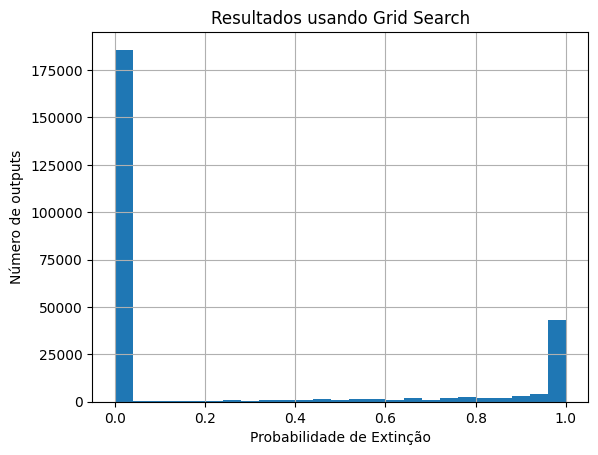

In [43]:
grid_search_predictions = pd.DataFrame(predictions)
grid_search_predictions.to_csv("grid_search.csv", index=False)
grid_search_predictions.hist(bins = 25)
plt.xlabel('Probabilidade de Extinção')
plt.ylabel('Número de outputs')
plt.title('Resultados usando Grid Search')

Neste caso, vemos que os melhores hiperparâmetros são: max_features = 8 e n_estimators = 30, obtendo um erro de 

### Randomized Search:

No caso em que desejamos obter uma quantidade maior de combinações de hiperparâmetros usar o Grid Search não é a melhor alternativa. Neste caso usamos o randomized search, onde é informado apenas o  número de iterações desejado, sendo os hiperparâmetros determinados de maneira aleatória, como o próprio nome sugere.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
param_rand = {'n_estimators': np.arange(50, 500, 50),  # Número de árvores (50 a 450)
    'max_features': ['sqrt', 'log2']}
randomized_search = RandomizedSearchCV(forest_reg, param_rand, n_iter=27,
scoring='neg_mean_squared_error',
return_train_score=True)
randomized_search.fit(sirs_prepared, sirs_labels)
randomized_search.best_params_

/home/germano/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=27. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': np.int64(450), 'max_features': 'log2'}

In [45]:
randomized_cvres = randomized_search.cv_results_
for mean_score, std_score, params in zip(randomized_cvres["mean_test_score"], randomized_cvres["std_test_score"], randomized_cvres["params"]):
    print(f"RMSE: {np.sqrt(-mean_score):.4f} ± {np.sqrt(std_score):.4f}", params)

RMSE: 0.0346 ± 0.0078 {'n_estimators': np.int64(50), 'max_features': 'sqrt'}
RMSE: 0.0341 ± 0.0054 {'n_estimators': np.int64(100), 'max_features': 'sqrt'}
RMSE: 0.0339 ± 0.0072 {'n_estimators': np.int64(150), 'max_features': 'sqrt'}
RMSE: 0.0335 ± 0.0064 {'n_estimators': np.int64(200), 'max_features': 'sqrt'}
RMSE: 0.0336 ± 0.0067 {'n_estimators': np.int64(250), 'max_features': 'sqrt'}
RMSE: 0.0334 ± 0.0063 {'n_estimators': np.int64(300), 'max_features': 'sqrt'}
RMSE: 0.0334 ± 0.0066 {'n_estimators': np.int64(350), 'max_features': 'sqrt'}
RMSE: 0.0333 ± 0.0066 {'n_estimators': np.int64(400), 'max_features': 'sqrt'}
RMSE: 0.0333 ± 0.0069 {'n_estimators': np.int64(450), 'max_features': 'sqrt'}
RMSE: 0.0295 ± 0.0077 {'n_estimators': np.int64(50), 'max_features': 'log2'}
RMSE: 0.0290 ± 0.0070 {'n_estimators': np.int64(100), 'max_features': 'log2'}
RMSE: 0.0288 ± 0.0064 {'n_estimators': np.int64(150), 'max_features': 'log2'}
RMSE: 0.0286 ± 0.0065 {'n_estimators': np.int64(200), 'max_feature

Text(0.5, 1.0, 'Resultados usando randomized Search')

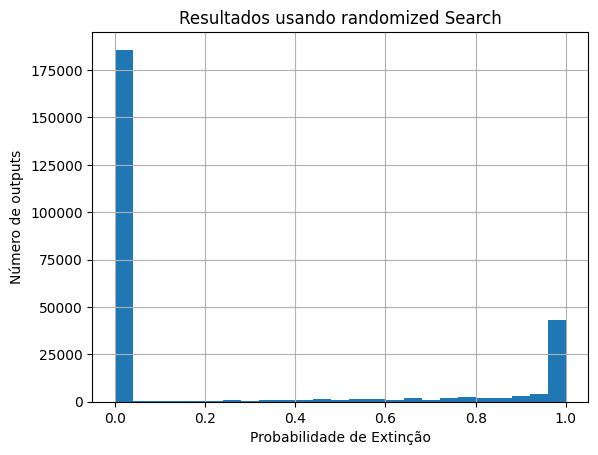

In [46]:
randomized_search_predictions = pd.DataFrame(predictions)
randomized_search_predictions.to_csv("randomized_search.csv", index=False)
randomized_search_predictions.hist(bins = 25)
plt.xlabel('Probabilidade de Extinção')
plt.ylabel('Número de outputs')
plt.title('Resultados usando randomized Search')

### Importância de cada atributo na determinação do valor de saída:

Assim como analisamos no gráfico de correlação entre as variáveis, há alguns atributos que estão maios fortemente relacionados com o valor que buscamos encontrar. Esta mesma análise pode ser feita usando o comando grid_search.best_estimator_.feature_importances_ (no caso do grid search). Este comando gera como output uma tabela em que cada atributo é relacionado com a fração de importância que ele tem no modelo, como podemos ver abaixo:

In [47]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, sirs_prepared), reverse=True)

[(np.float64(0.35985368718990424), 2),
 (np.float64(0.2564379031493453), 0),
 (np.float64(0.150485195272333), 3),
 (np.float64(0.09245626366638673), 7),
 (np.float64(0.04597313220916398), 1),
 (np.float64(0.042804862576797796), 5),
 (np.float64(0.03275511066920444), 6),
 (np.float64(0.01923384526686469), 4)]

0) N - Tamanho da população
1) R0 - Número de reprodução básico
2) mu - Taxa de cura
3) delta - Taxa de perda de imunidade
4) vac_num - Número de vacinas disponíveis (Normalizado)
5) t0 - Data de início da vacinação
6) a - Taxa de vacinação
7) beta - Taxa de transmissão da doença

In [48]:
feature_importances = randomized_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, sirs_prepared), reverse=True)

[(np.float64(0.39991873759502233), 2),
 (np.float64(0.18627767664791547), 0),
 (np.float64(0.14007682183021405), 3),
 (np.float64(0.13962918160565177), 7),
 (np.float64(0.05048606916591985), 1),
 (np.float64(0.0357495371190081), 5),
 (np.float64(0.02880736558705264), 6),
 (np.float64(0.019054610449215623), 4)]

Com estes dados pode ser interessante descartar alguns dos dados com menor importância, de modo a obter resultados mais relevantes e menos custosos computacionalmente, visto que teremos menos atributos.

## Avaliando o modelo no Test Set:

Resta agora avaliar nosso modelo no test set, e é exatamente isso que iremos fazer no código abaixo:

Obs: Tome cuidado para apenas usar o método transform() no test Set e não fit_transform(), pois não queremos que o modelo aprenda com os dados do Test Set, queremos apenas que ele teste sua validade.

In [49]:
strat_test_set

,index,n,r0,gamma,delta,vac_num,t0,a,min_inf,log_n,prob_ext
223956,223956,100000.0,15,0.15,0.10,0.45,60,0.02,1.000000e-05,5.0,0.000000
310468,310468,10000000.0,13,0.05,0.01,0.30,20,0.08,1.000000e-07,7.0,0.000000
297629,297629,10000000.0,7,0.20,0.07,0.30,60,0.09,1.000000e-07,7.0,0.000000
200666,200666,100000.0,7,0.20,0.04,0.90,120,0.05,1.000000e-05,5.0,0.000000
188694,188694,100000.0,3,0.20,0.04,1.35,120,0.02,1.000000e-05,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
256369,256369,1000000.0,11,0.05,0.01,1.50,20,0.03,1.000000e-06,6.0,0.000000
259904,259904,1000000.0,11,0.15,0.07,0.60,40,0.05,1.000000e-06,6.0,0.000000
38475,38475,10000000.0,1,0.05,0.10,1.20,40,0.10,5.489526e-08,7.0,0.451047
26708,26708,10000000.0,3,0.05,0.04,1.20,100,0.01,1.000000e-07,7.0,0.000000


In [60]:
print(strat_test_set.columns)


Index(['n', 'r0', 'gamma', 'delta', 'vac_num', 't0', 'a', 'log_n', 'beta'], dtype='object')


In [62]:
final_model_1 = grid_search.best_estimator_
strat_test_set['beta'] = strat_test_set['gamma']*strat_test_set['r0']
strat_test_set = strat_test_set.drop(columns=['n'])
num_pipeline = Pipeline([('std_scaler', StandardScaler()),
])
sirs_test_prepared = num_pipeline.fit_transform(strat_test_set)

final_predictions_1 = final_model_1.predict(sirs_test_prepared)

In [63]:
final_mse_1 = mean_squared_error(test_labels, final_predictions_1)
final_rmse_1 = np.sqrt(final_mse_1)
print(final_rmse_1)

0.02172511450650251


In [65]:
from scipy import stats
confidence = 0.95
squared_errors_1 = (final_predictions_1 - test_labels) ** 2

# Calcula o intervalo de confiança para o MSE
mse_confidence_interval = stats.t.interval(
    confidence, 
    df=len(squared_errors_1) - 1, 
    loc=squared_errors_1.mean(), 
    scale=stats.sem(squared_errors_1)
)

# Calcula a raiz quadrada dos limites do intervalo de confiança (convertendo MSE para RMSE)
rmse_confidence_interval = (np.sqrt(mse_confidence_interval[0]), np.sqrt(mse_confidence_interval[1]))

print(rmse_confidence_interval)

(np.float64(0.020215098333654723), np.float64(0.023136788887007674))


Portanto, temos um índice de confiança de 95% de que o erro quadrático médio de nosso modelo Grid Search está entre 0.02485 e 0.03566.

Text(0.5, 1.0, 'Resultados usando Grid Search')

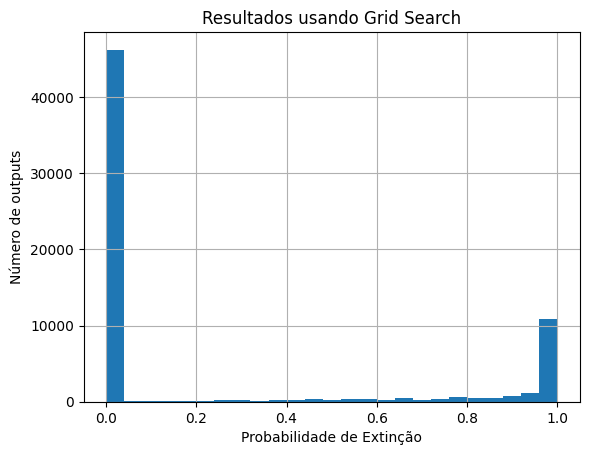

In [66]:
final_predictions_1 = pd.DataFrame(final_predictions_1)
final_predictions_1.hist(bins=25)
plt.xlabel('Probabilidade de Extinção')
plt.ylabel('Número de outputs')
plt.title('Resultados usando Grid Search')

In [67]:
final_model_2 = randomized_search.best_estimator_
final_predictions_2 = final_model_2.predict(sirs_test_prepared)
final_mse_2 = mean_squared_error(test_labels, final_predictions_2)
final_rmse_2 = np.sqrt(final_mse_2)
print(final_rmse_2)

0.02469616427374753


In [68]:
confidence = 0.95
squared_errors_2 = (final_predictions_2 - test_labels) ** 2

# Calcula o intervalo de confiança para o MSE
mse_confidence_interval = stats.t.interval(
    confidence, 
    df=len(squared_errors_2) - 1, 
    loc=squared_errors_2.mean(), 
    scale=stats.sem(squared_errors_2)
)

# Calcula a raiz quadrada dos limites do intervalo de confiança (convertendo MSE para RMSE)
rmse_confidence_interval = (np.sqrt(mse_confidence_interval[0]), np.sqrt(mse_confidence_interval[1]))

print(rmse_confidence_interval)

(np.float64(0.023500432128665472), np.float64(0.02583661644716342))


Portanto, temos um índice de confiança de 95% de que o erro quadrático médio de nosso modelo Grid Search está entre 0.03083 e 0.04036.

Text(0.5, 1.0, 'Resultados usando Randomized Search')

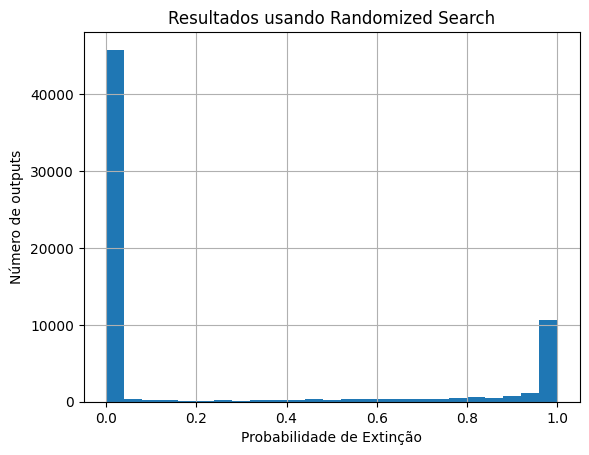

In [69]:
final_predictions_2 = pd.DataFrame(final_predictions_2)
final_predictions_2.hist(bins=25)
plt.xlabel('Probabilidade de Extinção')
plt.ylabel('Número de outputs')
plt.title('Resultados usando Randomized Search')